In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from orders.csv and handling null values
df = pd.read_csv('orders.csv', na_values=['Not Available', 'unknown'])
df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [2]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [3]:
# Rename columns

#df.rename(columns={"Order Id": "order_id","City": "city"}) / not proper way

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [4]:
# Create new column discount, sale_price and profit

df["discount"] = df["list_price"] * df["discount_percent"]*.01
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9


In [5]:
df["sale_price"] = df["list_price"] - df["discount"]
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1


In [6]:
df["profit"] = df["sale_price"] - df["cost_price"]
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


In [7]:
# Drop discount_percent, cost_price and list_price columns

df.drop(columns=["discount_percent", "cost_price", "list_price"], inplace=True)
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [8]:
# Convert data type of order_date to datetime
df.dtypes

order_id          int64
order_date       object
ship_mode        object
segment          object
country          object
city             object
state            object
postal_code       int64
region           object
category         object
sub_category     object
product_id       object
quantity          int64
discount        float64
sale_price      float64
profit          float64
dtype: object

In [9]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%Y-%m-%d")

In [10]:
df.dtypes

order_id                 int64
order_date      datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
postal_code              int64
region                  object
category                object
sub_category            object
product_id              object
quantity                 int64
discount               float64
sale_price             float64
profit                 float64
dtype: object

In [11]:
# Find top 10 highest revenue generating products

top_revenue = df.groupby("product_id")["sale_price"].sum().nlargest(10) # nlargest(10) is used to get top 10 values
top_revenue

product_id
TEC-CO-10004722    59514.0
OFF-BI-10003527    26525.3
TEC-MA-10002412    21734.4
FUR-CH-10002024    21096.2
OFF-BI-10001359    19090.2
OFF-BI-10000545    18249.0
TEC-CO-10001449    18151.2
TEC-MA-10001127    17906.4
OFF-BI-10004995    17354.8
OFF-SU-10000151    16325.8
Name: sale_price, dtype: float64

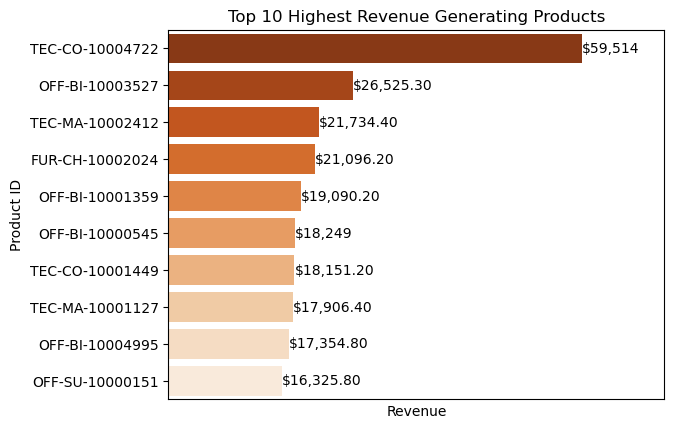

In [12]:

# Plot top 10 highest revenue generating products

sns.barplot(
    x=top_revenue.values,
    y=top_revenue.index,
    hue=top_revenue.index,
    palette="Oranges_r",
)

plt.xlabel("Revenue")
plt.ylabel("Product ID")
plt.title("Top 10 Highest Revenue Generating Products")
plt.xticks([])
plt.xlim(0, top_revenue.values[0] * 1.2)

for i in range(len(top_revenue)):
    plt.text(top_revenue.iloc[i], i, f"${top_revenue.iloc[i]:,.2f}".replace(".00", ""), ha="left", va="center")

plt.show()

In [13]:
# Find top 5 highest selling products in each region

region_sales = df.groupby(["region", "product_id"])["sale_price"].sum()
region_sales

region   product_id     
Central  FUR-BO-10000112     805.1
         FUR-BO-10000362     349.2
         FUR-BO-10000468     180.5
         FUR-BO-10000711     203.7
         FUR-BO-10000780    2223.1
                             ...  
West     TEC-PH-10004896      68.6
         TEC-PH-10004897      19.2
         TEC-PH-10004908    1433.2
         TEC-PH-10004922     459.2
         TEC-PH-10004977    1500.9
Name: sale_price, Length: 5298, dtype: float64

In [14]:
top_region_sales = region_sales.groupby("region").nlargest(5)

top_region_sales = top_region_sales.round(2)

top_region_sales

region   region   product_id     
Central  Central  TEC-CO-10004722    16975.0
                  TEC-MA-10000822    13770.0
                  OFF-BI-10001120    11056.5
                  OFF-BI-10000545    10132.7
                  OFF-BI-10004995     8416.1
East     East     TEC-CO-10004722    29099.0
                  TEC-MA-10001047    13767.0
                  FUR-BO-10004834    11274.1
                  OFF-BI-10001359     8463.6
                  TEC-CO-10001449     8316.0
South    South    TEC-MA-10002412    21734.4
                  TEC-MA-10001127    11116.4
                  OFF-BI-10001359     8053.2
                  TEC-MA-10004125     7840.0
                  OFF-BI-10003527     7391.4
West     West     TEC-CO-10004722    13440.0
                  OFF-SU-10000151    12592.3
                  FUR-CH-10001215     9604.0
                  OFF-BI-10003527     7804.8
                  TEC-AC-10003832     7722.7
Name: sale_price, dtype: float64

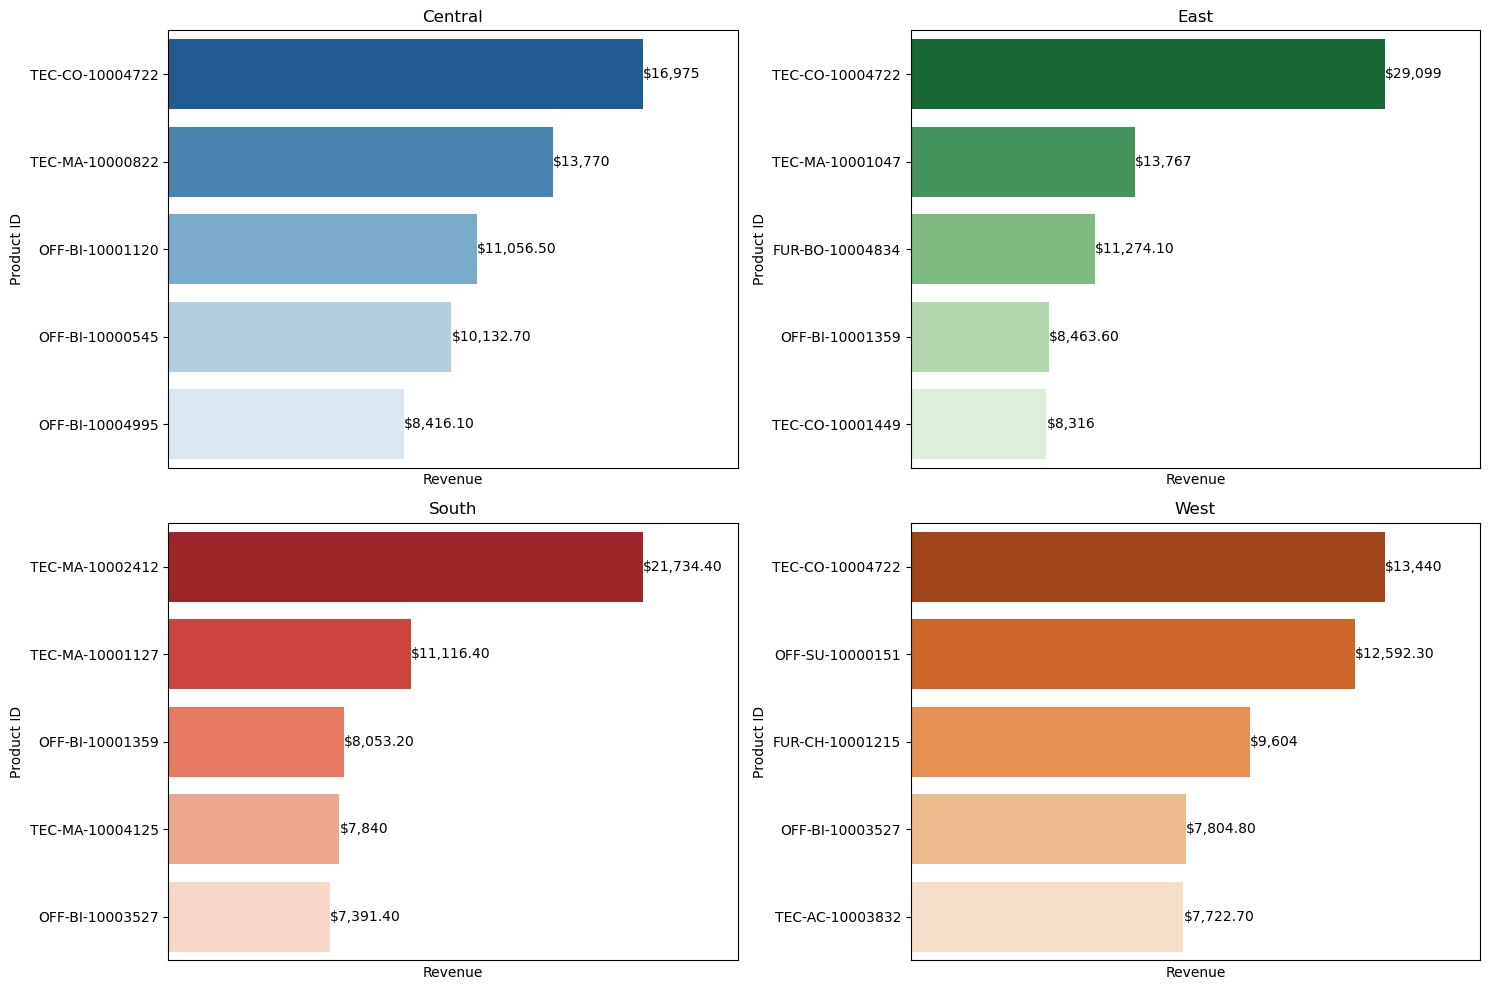

In [15]:
# Plot top 5 highest selling products in each region

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
color_palettes = ["Blues_r", "Greens_r", "Reds_r", "Oranges_r"]

for i, (region, sales) in enumerate(top_region_sales.groupby("region")):
    ax = axes[i // 2, i % 2]
    sns.barplot(
        x=sales.values,
        y=sales.index.get_level_values("product_id"),
        hue=sales.index.get_level_values("product_id"),
        ax=ax,
        palette=color_palettes[i],
        legend=False,
    )
    ax.set_title(region)
    ax.set_xlabel("Revenue")
    ax.set_ylabel("Product ID")
    ax.set_xlim(0, sales.values[0] * 1.2)
    ax.set_xticks([])

    for j in range(len(sales)):
        ax.text(sales.iloc[j], j, f"${sales.iloc[j]:,.2f}".replace(".00", ""), ha="left", va="center")

fig.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [16]:
# Find month over month growth comparison for 2022 and 2023 sales 

df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month

df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2,2023,2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4,2023,3
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8,2022,8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9,2022,11


In [17]:
month_over_month = df.groupby(["year", "month"])["sale_price"].sum().unstack("year")
month_over_month

year,2022,2023
month,,
1,94712.5,88632.6
2,90091.0,128124.2
3,80106.0,82512.3
4,95451.6,111568.6
5,79448.3,86447.9
6,94170.5,68976.5
7,78652.2,90563.8
8,104808.0,87733.6
9,79142.2,76658.6


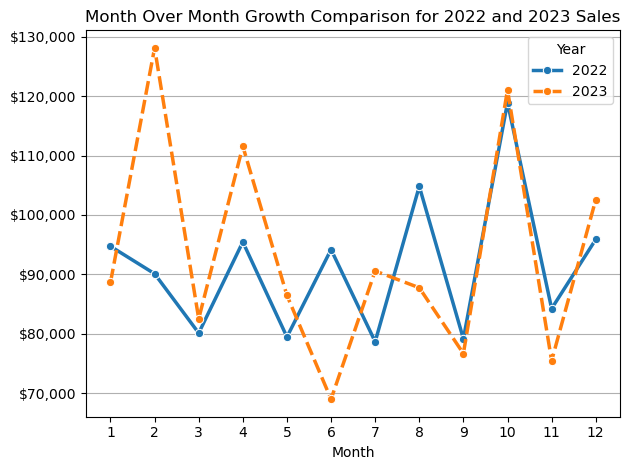

In [18]:
# Plot month over month growth comparison for 2022 and 2023 sales

sns.lineplot(data=month_over_month, marker="o", palette="tab10", linewidth=2.5)

plt.xlabel("Month")
plt.ylabel("")
plt.title("Month Over Month Growth Comparison for 2022 and 2023 Sales")
plt.legend(title="Year")
plt.grid(axis="y")
plt.xticks(range(1, 13))

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

In [89]:
# For each category which month had highest sales

category_best_sales = (
    df.groupby(["category", "order_date"])["sale_price"]
    .sum()
    .reset_index()
    .sort_values("sale_price", ascending=False)
    .drop_duplicates("category")
)

category_best_sales

,category,order_date,sale_price
2016,Technology,2023-10-13,23064.4
1113,Office Supplies,2023-02-27,10474.6
382,Furniture,2023-02-08,6247.0


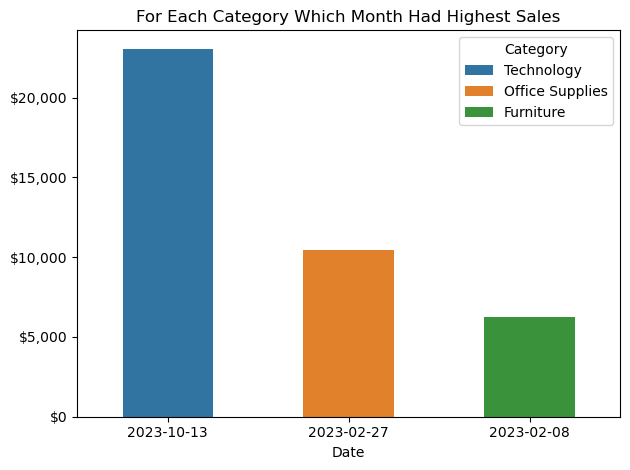

In [94]:
# Plot for each category which month had highest sales

sns.barplot(data=category_best_sales, x="order_date", y="sale_price", hue="category", palette="tab10", width=0.5)

plt.xlabel("Date")
plt.ylabel("")
plt.title("For Each Category Which Month Had Highest Sales")

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x:,.0f}"))

plt.legend(title="Category")
plt.tight_layout()
plt.show()

In [127]:
# Find growth percentage for each sub category from 2022 to 2023

sub_category_df = df.groupby(["year", "sub_category"])["profit"].sum().unstack("year")

sub_category_df["growth_perc"] = (
    (sub_category_df[2023] - sub_category_df[2022]) / sub_category_df[2022] * 100
).round(2)

sub_category_df

year,2022,2023,growth_perc
sub_category,,,
Accessories,7387.2,8057.4,9.07
Appliances,6374.4,3893.3,-38.92
Art,924.1,935.7,1.26
Binders,8685.5,10523.1,21.16
Bookcases,5459.5,5036.6,-7.75
Chairs,14725.3,15089.8,2.48
Copiers,8780.3,5718.6,-34.87
Envelopes,607.2,640.0,5.40
Fasteners,40.1,8.8,-78.05


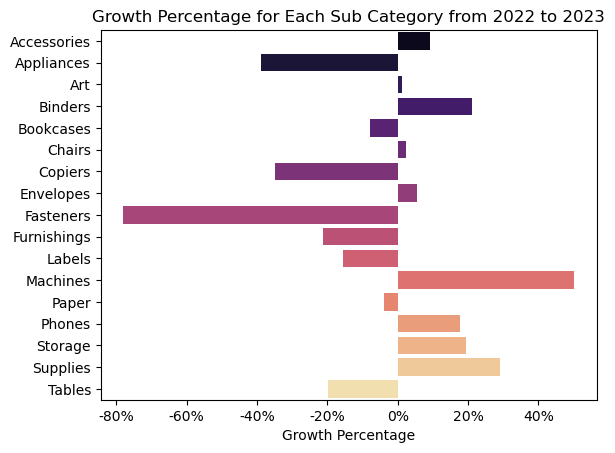

In [145]:
# Plot growth percentage for each sub category from 2022 to 2023

sns.barplot(data=sub_category_df, x="growth_perc", y=sub_category_df.index, hue=sub_category_df.index, palette="magma")

plt.xlabel("Growth Percentage")
plt.ylabel("")
plt.title("Growth Percentage for Each Sub Category from 2022 to 2023")

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.0f}%"))

plt.show()

In [126]:
# Which sub category had highest growth by profit in 2023 compare to 2022

highest_growth = sub_category_df.sort_values("growth_perc", ascending=False).head(1)

highest_growth

year,2022,2023,growth_perc
sub_category,,,
Machines,7243.2,10878.5,50.19


In [169]:
# Find the top 5 states with highest profit in 2023 and 2022

state_profits = (
    df.groupby(["year", "state"])["profit"]
    .sum()
    .unstack("year")
    .sort_values(2023, ascending=False)
    .head(5)
)
state_profits

year,2022,2023
state,,
California,21387.5,18819.5
New York,11614.9,13942.6
Texas,7215.3,7731.6
Florida,3427.0,6364.1
Pennsylvania,4544.1,5683.3


In [189]:
state_profits_pivoted = state_profits.stack().reset_index(
    name="profit"
)  # i need to convert it to long format to plot (two bars for each state)

state_profits_pivoted

,state,year,profit
0,California,2022,21387.5
1,California,2023,18819.5
2,New York,2022,11614.9
3,New York,2023,13942.6
4,Texas,2022,7215.3
5,Texas,2023,7731.6
6,Florida,2022,3427.0
7,Florida,2023,6364.1
8,Pennsylvania,2022,4544.1
9,Pennsylvania,2023,5683.3


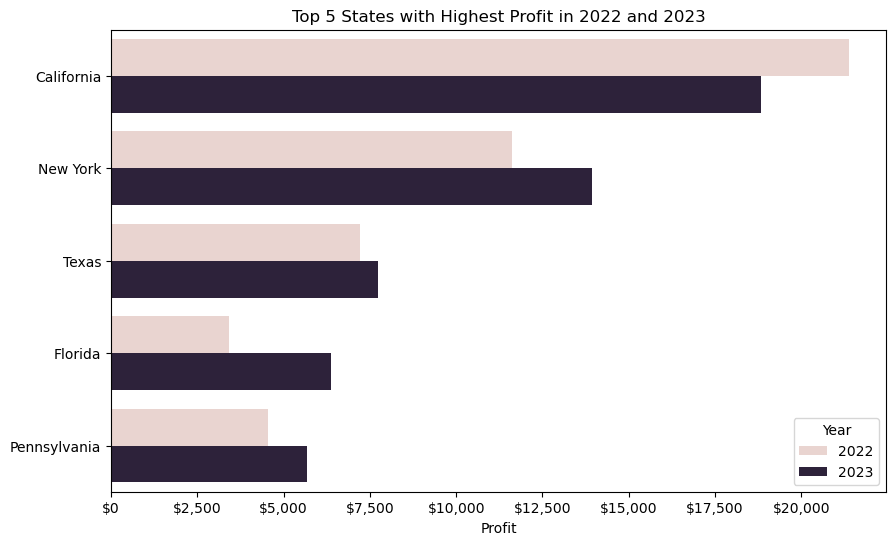

In [214]:
plt.figure(figsize=(10, 6))
sns.barplot(data=state_profits_pivoted, x="profit", y="state", hue="year")

plt.xlabel("Profit")
plt.ylabel("")
plt.title("Top 5 States with Highest Profit in 2022 and 2023")
plt.legend(title="Year")
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${x:,.0f}"))
plt.show()
